In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!ls /content/drive/MyDrive/Dataset/

add_stim.mat		   Control_splitset  d5.mat    sub_name_stim.mat
adhd_stim.mat		   control_stim.mat  d6.mat    test_segments
chan.mat		   d1.mat	     d7.mat    y_stim.mat
clustering_models	   d2.mat	     features
combined_adhd_data.mat	   d3.mat	     model
combined_control_data.mat  d4.mat	     splitset


In [20]:
import numpy as np

adhd_tlbr_path = "/content/drive/MyDrive/Dataset/features/adhd_tlbr_values.npy"
adhd_tlbr = np.load(adhd_tlbr_path)

control_tlbr_path = "/content/drive/MyDrive/Dataset/features/control_tlbr_values.npy"
control_tlbr = np.load(control_tlbr_path)

In [21]:
print(f"Control tlbr range: {np.min(control_tlbr):.2f} to {np.max(control_tlbr):.2f}")
print(f"ADHD tlbr range: {np.min(adhd_tlbr):.2f} to {np.max(adhd_tlbr):.2f}")

Control tlbr range: 0.84 to 2.77
ADHD tlbr range: 0.78 to 2.85


In [22]:
print("Control Participants:")
print(f"Mean tlbr: {np.mean(control_tlbr):.2f}")
print(f"Median tlbr: {np.median(control_tlbr):.2f}")
print(f"Std tlbr: {np.std(control_tlbr):.2f}")

print("\nADHD Participants:")
print(f"Mean tlbr: {np.mean(adhd_tlbr):.2f}")
print(f"Median tlbr: {np.median(adhd_tlbr):.2f}")
print(f"Std tlbr: {np.std(adhd_tlbr):.2f}")

Control Participants:
Mean tlbr: 1.49
Median tlbr: 1.48
Std tlbr: 0.22

ADHD Participants:
Mean tlbr: 1.48
Median tlbr: 1.47
Std tlbr: 0.23


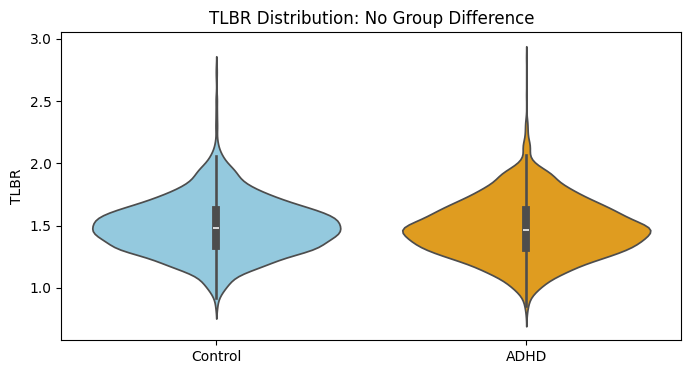

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.violinplot(data=[control_tlbr.squeeze(), adhd_tlbr.squeeze()], palette=["skyblue", "orange"])
plt.xticks([0, 1], ['Control', 'ADHD'])
plt.ylabel('TLBR')
plt.title('TLBR Distribution: No Group Difference')
plt.show()

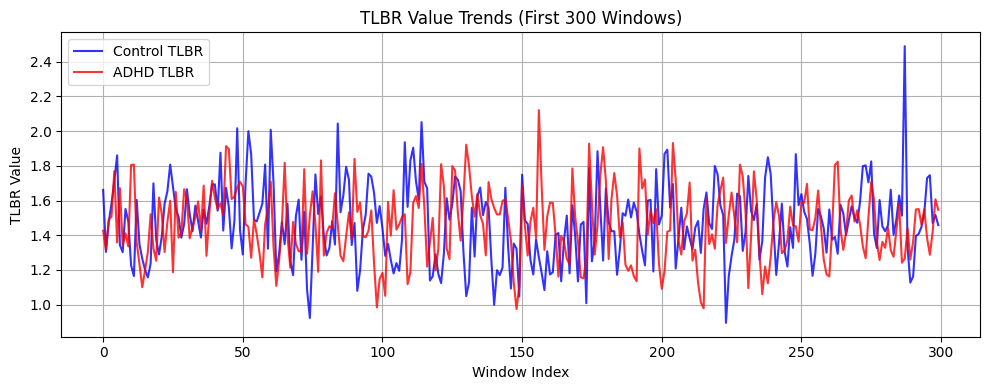

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(control_tlbr[:300], label='Control TLBR', color='blue', alpha=0.8)
plt.plot(adhd_tlbr[:300], label='ADHD TLBR', color='red', alpha=0.8)

plt.xlabel("Window Index")
plt.ylabel("TLBR Value")
plt.title("TLBR Value Trends (First 300 Windows)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


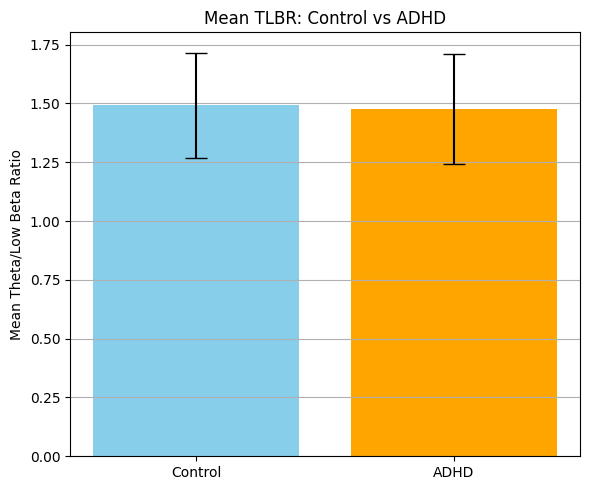

In [25]:
# Calculate means
mean_Control = np.mean(control_tlbr)
mean_adhd = np.mean(adhd_tlbr)

# Calculate standard deviation (for error bars, optional)
std_Control = np.std(control_tlbr)
std_adhd = np.std(adhd_tlbr)

# Bar plot
labels = ['Control', 'ADHD']
means = [mean_Control, mean_adhd]
errors = [std_Control, std_adhd]

plt.figure(figsize=(6, 5))
plt.bar(labels, means, yerr=errors, capsize=8, color=['skyblue', 'orange'])

plt.ylabel("Mean Theta/Low Beta Ratio")
plt.title("Mean TLBR: Control vs ADHD")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
